#3장 신경망 파헤치기

In [ ]:
import torch
from torch.nn import Linear, ReLU
import torch.nn as nn
import numpy as np
from torch.autograd import Variable
import torch.nn.functional as F

## Layer : 신경망 기본 블록

Linear Layer

In [ ]:
myLayer = Linear(in_features=10,out_features=5,bias=True)
inp = Variable(torch.randn(1,10))

In [ ]:
myLayer(inp)

tensor([[ 0.5888,  0.2689, -0.0780,  0.0505, -0.2214]],
       grad_fn=<AddmmBackward>)

In [ ]:
myLayer.weight

Parameter containing:
tensor([[-0.0141, -0.0478, -0.1457, -0.2365, -0.0741, -0.2171,  0.0825,  0.1986,
          0.3117, -0.2401],
        [-0.0055,  0.2331,  0.1923, -0.2953, -0.2244, -0.0601,  0.0981,  0.1269,
          0.1072, -0.0430],
        [ 0.0794,  0.0682,  0.2143,  0.1614,  0.0850, -0.1102, -0.0387,  0.0875,
         -0.1644, -0.0219],
        [-0.1901, -0.2825, -0.0995,  0.0205,  0.2311, -0.1520,  0.2963,  0.1501,
         -0.0434, -0.1920],
        [ 0.2091, -0.0742, -0.0058,  0.0747,  0.2331, -0.3041,  0.0320, -0.1598,
         -0.1802, -0.0481]], requires_grad=True)

In [ ]:
myLayer.bias

Parameter containing:
tensor([-0.1288,  0.1187,  0.2116, -0.0511, -0.0370], requires_grad=True)

선형 레이어 쌓기

In [ ]:
myLayer1 = Linear(10,5)
myLayer2 = Linear(5,2)
myLayer2(myLayer1(inp))

tensor([[ 0.1623, -0.4022]], grad_fn=<AddmmBackward>)

## 비선형 활성 함수

### sigmoid

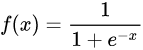

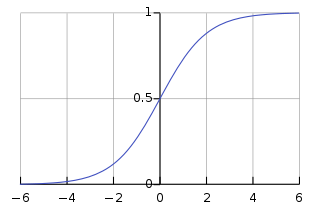

출처 : 위키백과

시그모이드 함수는 실수를 취하고, 0과 1 사이의 숫자를 출력한다. 큰 음수를 입력하면 0에 가까운 값, 큰 양수를 입력하면 1에 가까운 값을 반환한다.

단점 
- Gradient Vanishing : 함수의 출력값이 0또는 1에 가까워지면, 시그모이드 함수의 앞 레이어 기울기는 거의 0이 된다. 따라서 이전 레이어의 학습 파라미터는 0에 가까운 기울기를 갖게 되고, 결과적으로 가중치가 조정되지 않는 현상이 발생한다.

- 함수값 중심이 0이 아니다. : 함수값 중심이 0이 아니라 학습이 느려질 수 있다. => 한 노드에 대해 모든 파라미터 W의 미분값은 모두 같은 부호를 같게 된다. 따라서 같은 방향으로 update되는데 이러한 과정은 학습을 zigzag 형태로 만들어 느리게 만드는 원인이 된다.

### Tanh

하이퍼볼릭탄젠트 함수

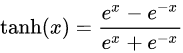tanh(x)=2σ(2x)−1

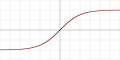

출처 : 위키백과

Tanh 비선형 함수는 실수를 입력받고, 입력값을 -1과 1 사이의 값으로 변환한다. Tanh도 -1과 1에 가까운 값을 출력할 때, 기울기가 없어지는 시그모이드와 같은 문제가 발생한다.

그러나 Tanh 함수의 출력값은 을 중심으로 만들어지기 때문에 시그모이드와 비교해 반환값의 변화폭이 크다. 따라서 시그모이드보다 기울기가 소멸하는 Vanishing Gradient증상이 작게 발생한다.

### ReLU

f(x)=max(0,x)

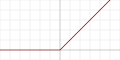

출처 : 위키백과

ReLU는 음수를 입력하면 0을 출력하고, 양수를 입력하면 입력값을 그대로 반환한다.

- ReLU는 옵티마이저가 더 빨리 올바른 가중치를 찾도록 돕는다. 기술적으로 ReLU는 SGD가 더 빨리 수렴할 수 있도록 한다.
- 연산 비용이 저렴하다. ReLU는 임곗값을 가질 뿐이며, 시그모이드 함수와 Tanh 함수와 같은 연산을 수행하지 않는다.
  

단점  
- 연적파를 진행하면서 기울기가 큰 값을 ReLU에 전달하면 종종 응답이 없어진다. 이런 현상을 "Dead Neural"이라고 부른다. 이 문제는 학습률을 신중하게 설정함으로써 방지할 수 있다.   
<= x<0 인 값들에 대해서는 기울기가 0이기 때문임

### Leakly ReLU

f(x)=max(0.01x,x)

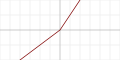

출처 : 위키백과

Leakly ReLU는 ReLU의 0으로 수렴해 더 이상 학습되지 않는 문제를 해결하기 위해 제안된 함수이다. 음수가 입력될 경우에 0이 아닌 0.01과 같은 매우 작은수를 반환한다.

일부 사례에서 다른 활성화 함수보다 우수한 성능을 보이지만 일관성을 갖진 않는다.

### PReLU

f(x)=max(αx,x)

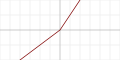

출처 : 위키백과

Leakly ReLU와 거의 유사하지만 새로운 파라미터 α 를 추가하여 x<0에서 기울기를 학습할 수 있게 하였다.

### Exponential Linear Unit(ELU)

f(x)=x   if  x>0

f(x)=α(e^x−1)  if   x≤0

https://arxiv.org/abs/1511.07289

- ReLU의 모든 장점을 포함한다.
- “Dying ReLU” 문제를 해결했다.
- 출력값이 거의 zero-centered에 가깝다
- 일반적인 ReLU와 달리 exp함수를 계산하는 비용이 발생한다.

### Maxout

max(w1x + b1, w2x+b2)

ReLU와 Leaky ReLU 를 일반화한 함수

위에 식처럼,activation 함수가 w1,w2,b1,b2 파라미터를 더 추가함. 결국 전체 네트워크의 파라미터 개수가 2배 증가

## 파이토치 비선형 활성화 함수

In [ ]:
sample_data = Variable(torch.Tensor([[1,2,-1,-1]])) 
myRelu = ReLU()
myRelu(sample_data)

tensor([[1., 2., 0., 0.]])

In [ ]:
sample_data = Variable(torch.Tensor([[1,2,-1,-1]])) 
f = F.relu(sample_data) # Much simpler.
f

tensor([[1., 2., 0., 0.]])